In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1-Reading and getting information about the Data


In [4]:
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot  

# tells matplotlib to embed plot within the notebook 
%matplotlib inline 

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMO-data/data.csv')

In [5]:
df.head()

Unnamed: 0  CRUDE_PETRO CRUDE_BRENT  ...   GOLD   PLATINUM    SILVER
0        1960         1.63          ..  ...  35.27  83.500000  0.913700
1        1961         1.57          ..  ...  35.25  83.500000  0.924442
2        1962         1.52          ..  ...  35.23  83.500000  1.083725
3        1963         1.50          ..  ...  35.09  80.930833  1.279108
4        1964         1.45          ..  ...  35.10  88.480833  1.293000

[5 rows x 70 columns]

In [6]:
df.tail()

Unnamed: 0  CRUDE_PETRO  CRUDE_BRENT  ...         GOLD     PLATINUM     SILVER
55        2015    50.752778        52.37  ...  1160.663333  1053.203333  15.720667
56        2016    42.811944      44.0475  ...  1248.988333   987.086667  17.146750
57        2017    52.805000      54.3925  ...  1257.559167   948.453333  17.066167
58        2018    68.347500  71.07166667  ...  1269.226667   879.545833  15.713750
59        2019    61.407500  64.03166667  ...  1392.498333   863.989167  16.217583

[5 rows x 70 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     60 non-null     int64  
 1   CRUDE_PETRO    60 non-null     float64
 2   CRUDE_BRENT    60 non-null     object 
 3   CRUDE_DUBAI    60 non-null     float64
 4   CRUDE_WTI      60 non-null     object 
 5   COAL_AUS       60 non-null     object 
 6   COAL_SAFRICA   60 non-null     object 
 7   NGAS_US        60 non-null     float64
 8   NGAS_EUR       60 non-null     float64
 9   NGAS_JP        60 non-null     object 
 10  iNATGAS        60 non-null     float64
 11  COCOA          60 non-null     float64
 12  COFFEE_ARABIC  60 non-null     float64
 13  COFFEE_ROBUS   60 non-null     float64
 14  TEA_AVG        60 non-null     float64
 15  TEA_COLOMBO    60 non-null     float64
 16  TEA_KOLKATA    60 non-null     float64
 17  TEA_MOMBASA    60 non-null     float64
 18  COCONUT_OIL 

In [8]:
 df.describe()

Unnamed: 0  CRUDE_PETRO  ...     PLATINUM     SILVER
count    60.000000    60.000000  ...    60.000000  60.000000
mean   1989.500000    30.082080  ...   552.916669   8.205859
std      17.464249    29.489431  ...   458.056705   7.466940
min    1960.000000     1.210000  ...    80.930833   0.913700
25%    1974.750000    10.839375  ...   159.316042   4.025021
50%    1989.500000    19.270938  ...   414.284583   5.250079
75%    2004.250000    39.003027  ...   850.009792  11.459521
max    2019.000000   105.009629  ...  1719.481667  35.224117

[8 rows x 52 columns]

In [9]:
df.describe().shape

(8, 52)

### 1.1-Checking for "NULL" values

In [10]:
df.isnull().sum()

Unnamed: 0     0
CRUDE_PETRO    0
CRUDE_BRENT    0
CRUDE_DUBAI    0
CRUDE_WTI      0
              ..
NICKEL         0
Zinc           0
GOLD           0
PLATINUM       0
SILVER         0
Length: 70, dtype: int64

### 1.2-Data Shape

In [11]:
df.shape

(60, 70)

# 2-Data Cleaning and Preparing

### 2.1-Copying original data to another DataFrame  

In [12]:
df2 = df.copy()

df2.head()

Unnamed: 0  CRUDE_PETRO CRUDE_BRENT  ...   GOLD   PLATINUM    SILVER
0        1960         1.63          ..  ...  35.27  83.500000  0.913700
1        1961         1.57          ..  ...  35.25  83.500000  0.924442
2        1962         1.52          ..  ...  35.23  83.500000  1.083725
3        1963         1.50          ..  ...  35.09  80.930833  1.279108
4        1964         1.45          ..  ...  35.10  88.480833  1.293000

[5 rows x 70 columns]

### 2.2-Replacing ".." values to "NaN"

In [13]:
df2 = df2.replace({'..':np.nan})

In [14]:
df2.head()

Unnamed: 0  CRUDE_PETRO CRUDE_BRENT  ...   GOLD   PLATINUM    SILVER
0        1960         1.63         NaN  ...  35.27  83.500000  0.913700
1        1961         1.57         NaN  ...  35.25  83.500000  0.924442
2        1962         1.52         NaN  ...  35.23  83.500000  1.083725
3        1963         1.50         NaN  ...  35.09  80.930833  1.279108
4        1964         1.45         NaN  ...  35.10  88.480833  1.293000

[5 rows x 70 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     60 non-null     int64  
 1   CRUDE_PETRO    60 non-null     float64
 2   CRUDE_BRENT    60 non-null     object 
 3   CRUDE_DUBAI    60 non-null     float64
 4   CRUDE_WTI      60 non-null     object 
 5   COAL_AUS       60 non-null     object 
 6   COAL_SAFRICA   60 non-null     object 
 7   NGAS_US        60 non-null     float64
 8   NGAS_EUR       60 non-null     float64
 9   NGAS_JP        60 non-null     object 
 10  iNATGAS        60 non-null     float64
 11  COCOA          60 non-null     float64
 12  COFFEE_ARABIC  60 non-null     float64
 13  COFFEE_ROBUS   60 non-null     float64
 14  TEA_AVG        60 non-null     float64
 15  TEA_COLOMBO    60 non-null     float64
 16  TEA_KOLKATA    60 non-null     float64
 17  TEA_MOMBASA    60 non-null     float64
 18  COCONUT_OIL 

### 2.3-Converting 'Object' data type into numeric

In [16]:
columns = df2.columns

for c in list(columns): 
  df2[c] = df2[c].astype('float64')

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     60 non-null     float64
 1   CRUDE_PETRO    60 non-null     float64
 2   CRUDE_BRENT    41 non-null     float64
 3   CRUDE_DUBAI    60 non-null     float64
 4   CRUDE_WTI      38 non-null     float64
 5   COAL_AUS       50 non-null     float64
 6   COAL_SAFRICA   36 non-null     float64
 7   NGAS_US        60 non-null     float64
 8   NGAS_EUR       60 non-null     float64
 9   NGAS_JP        43 non-null     float64
 10  iNATGAS        60 non-null     float64
 11  COCOA          60 non-null     float64
 12  COFFEE_ARABIC  60 non-null     float64
 13  COFFEE_ROBUS   60 non-null     float64
 14  TEA_AVG        60 non-null     float64
 15  TEA_COLOMBO    60 non-null     float64
 16  TEA_KOLKATA    60 non-null     float64
 17  TEA_MOMBASA    60 non-null     float64
 18  COCONUT_OIL 

### 2.4-Analyzing the value of Empty(NaN) in data frame

In [18]:
def missing_values_table(mydf):

  mis_val = mydf.isnull().sum()

  mis_val_percent = 100 * mydf.isnull().sum() / len(mydf) 

  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  mis_val_table_ren_columns = mis_val_table.rename(
      
      columns = {0:'Missing Values', 1:'% of total value of column'})
  
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of total value of column', ascending=False).round(1)

  return mis_val_table_ren_columns

In [19]:
missing_values_table(df2)

Missing Values  % of total value of column
RICE_05_VNM               49                        81.7
RUBBER_TSR20              39                        65.0
BANANA_EU                 37                        61.7
PLMKRNL_OIL               36                        60.0
SAWNWD_CMR                31                        51.7
RICE_25                   30                        50.0
RICE_A1                   26                        43.3
COAL_SAFRICA              24                        40.0
CRUDE_WTI                 22                        36.7
GRNUT                     20                        33.3
FISH_MEAL                 19                        31.7
WHEAT_US_SRW              19                        31.7
PLYWOOD                   19                        31.7
CRUDE_BRENT               19                        31.7
NGAS_JP                   17                        28.3
LAMB                      12                        20.0
LOGS_CMR                  10                        16.7
COAL_AUS                  10                        16.7

### 2.5-Removing missing values that is more than 50% in columm

In [20]:
missing_df = missing_values_table(df2)
missing_columns = list(missing_df[missing_df['% of total value of column']>50].index)
print('We remove %d tables' % len(missing_columns))


We remove 5 tables


#### Columns That need to be removed

In [21]:
missing_columns

['RICE_05_VNM', 'RUBBER_TSR20', 'BANANA_EU', 'PLMKRNL_OIL', 'SAWNWD_CMR']

#### Dropping not needed columns from dataframe

In [22]:
df2.shape

(60, 70)

In [23]:
df2 = df2.drop(columns = list(missing_columns))

In [24]:
df2.shape

(60, 65)

In [25]:
df2.head()

Unnamed: 0  CRUDE_PETRO  CRUDE_BRENT  ...   GOLD   PLATINUM    SILVER
0      1960.0         1.63          NaN  ...  35.27  83.500000  0.913700
1      1961.0         1.57          NaN  ...  35.25  83.500000  0.924442
2      1962.0         1.52          NaN  ...  35.23  83.500000  1.083725
3      1963.0         1.50          NaN  ...  35.09  80.930833  1.279108
4      1964.0         1.45          NaN  ...  35.10  88.480833  1.293000

[5 rows x 65 columns]

# 3 - Replacing 'NaN' values with the mean of that columns 

### 3.1 - Getting mean values of each table

In [26]:
means = df2.mean()

print(type(means))

print(means)
print('________________')
print(means['CRUDE_PETRO'])

<class 'pandas.core.series.Series'>
Unnamed: 0     1989.500000
CRUDE_PETRO      30.082080
CRUDE_BRENT      43.138715
CRUDE_DUBAI      29.333050
CRUDE_WTI        42.682958
                  ...     
NICKEL         8434.341159
Zinc           1141.416872
GOLD            467.746266
PLATINUM        552.916669
SILVER            8.205859
Length: 65, dtype: float64
________________
30.0820800679


### 3.2 - Copying DataFrame 2 to another one to save previous work

In [27]:
df3 = df2.copy()

### 3.3 - Replacing each missing values with its equivalent means

In [28]:
new_columns = df3.columns

for c in list(new_columns):
  #df3[c] = df3[c].replace(np.nan, means[c])
  df3[c].fillna(means[c], inplace=True)

In [29]:
df3.head()

Unnamed: 0  CRUDE_PETRO  CRUDE_BRENT  ...   GOLD   PLATINUM    SILVER
0      1960.0         1.63    43.138715  ...  35.27  83.500000  0.913700
1      1961.0         1.57    43.138715  ...  35.25  83.500000  0.924442
2      1962.0         1.52    43.138715  ...  35.23  83.500000  1.083725
3      1963.0         1.50    43.138715  ...  35.09  80.930833  1.279108
4      1964.0         1.45    43.138715  ...  35.10  88.480833  1.293000

[5 rows x 65 columns]

# 4 - Plotting and Analayzing Data with Graph

### 4.1 - 'NGAS_EU' columnd Distribution 

In [30]:
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


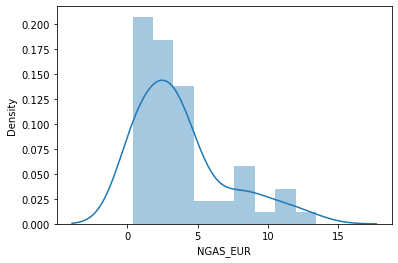

In [31]:
sns.distplot(df3['NGAS_EUR'])

### Correlations in HeatMap

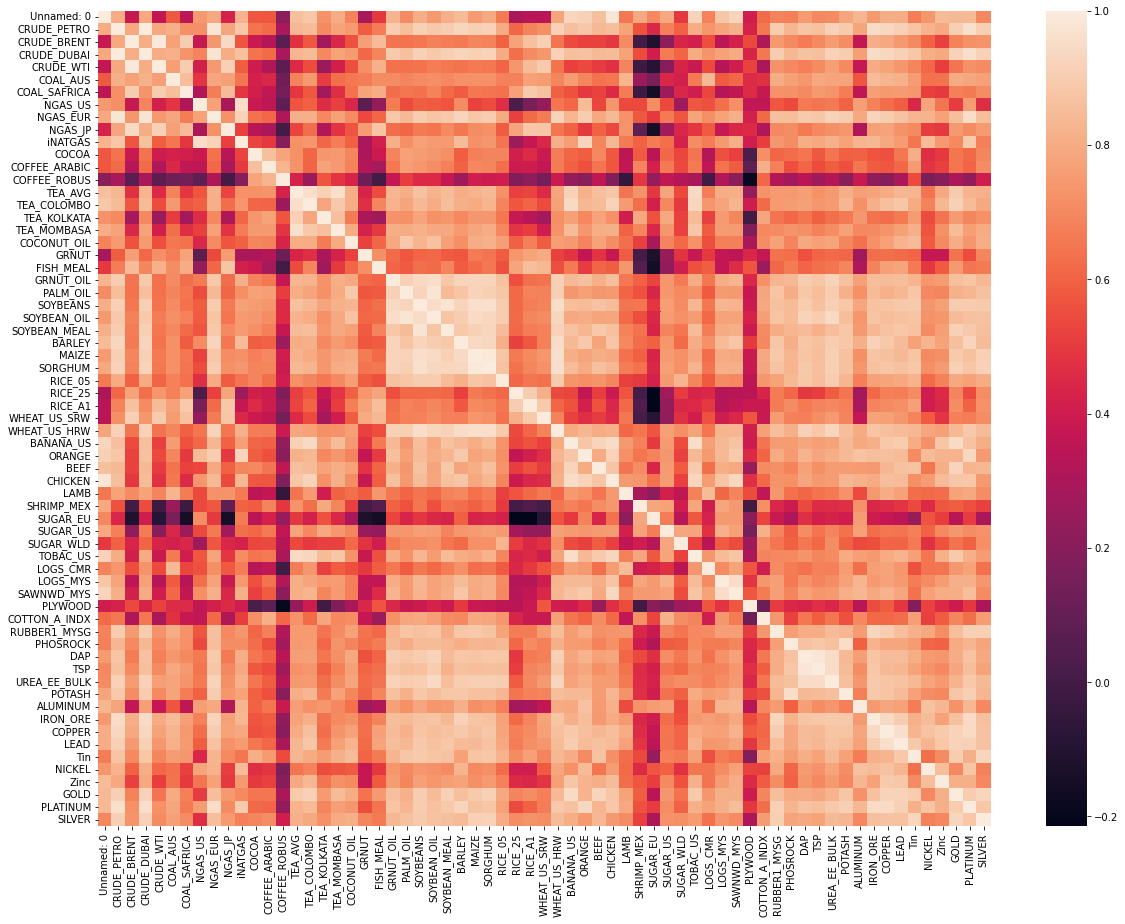

In [32]:
pyplot.subplots(figsize=(20,15))
sns.heatmap(df3.corr())

In [33]:
df3.corr().sum()

Unnamed: 0     45.529871
CRUDE_PETRO    51.773764
CRUDE_BRENT    39.002891
CRUDE_DUBAI    51.778762
CRUDE_WTI      38.307586
                 ...    
NICKEL         43.389876
Zinc           44.781304
GOLD           50.812115
PLATINUM       51.218950
SILVER         49.460004
Length: 65, dtype: float64

In [34]:
 corr_sum = df3.corr().sum()
 corr_sum.sort_values()

COFFEE_ROBUS    19.553220
PLYWOOD         25.148615
SUGAR_EU        25.568051
SHRIMP_MEX      32.748724
GRNUT           33.331818
                  ...    
PLATINUM        51.218950
SORGHUM         51.295807
SOYBEANS        51.739491
CRUDE_PETRO     51.773764
CRUDE_DUBAI     51.778762
Length: 65, dtype: float64

# 5 - Training Linier Regression Model 

### 5.1 - "X" = Row data, "Y" = Target Data

In [35]:
y = df3['NGAS_EUR']

In [36]:
y.head()

0    0.404774
1    0.404774
2    0.404774
3    0.391351
4    0.384150
Name: NGAS_EUR, dtype: float64

In [37]:
X = df3.drop(['NGAS_EUR'], axis = 1, inplace = False)

# inplace = False because this saves the original data in df3 but saves with
# dropping targeted data in X variable

In [38]:
X.head()

Unnamed: 0  CRUDE_PETRO  CRUDE_BRENT  ...   GOLD   PLATINUM    SILVER
0      1960.0         1.63    43.138715  ...  35.27  83.500000  0.913700
1      1961.0         1.57    43.138715  ...  35.25  83.500000  0.924442
2      1962.0         1.52    43.138715  ...  35.23  83.500000  1.083725
3      1963.0         1.50    43.138715  ...  35.09  80.930833  1.279108
4      1964.0         1.45    43.138715  ...  35.10  88.480833  1.293000

[5 rows x 64 columns]

### 5.2 - Splitting Data into Train and Test

In [39]:
# importing special package for spliting data 
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=101)

In [41]:
print(X_train.shape, X_test.shape)

(36, 64) (24, 64)


In [42]:
print(y_train.shape, y_test.shape)

(36,) (24,)


### 5.3 - Creating a Model (Linear Regression)

In [43]:
# importing library for Linear Regression from sklear 

from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

### 5.4 - Training Model 

In [45]:
lm.fit(X_train, y_train)

LinearRegression()

### 5.5 - Evaluate a Model 

In [46]:
lm.intercept_

10.684755583775825

In [47]:
lm.coef_

array([-8.20720386e-03,  5.40736581e-03,  6.26342211e-03,  4.36866163e-03,
        1.92504507e-02,  2.77933457e-02,  1.29960633e-02,  5.46226874e-05,
        1.77711411e-03,  2.78215173e-02, -1.23942920e-03, -4.79588640e-03,
       -9.11728431e-04, -1.13600060e-03, -9.52102534e-04, -1.60447789e-03,
       -8.51289998e-04, -4.00198333e-03,  4.79049559e-03,  3.91182206e-05,
       -3.90800443e-03,  3.25315201e-03, -2.96985093e-02,  6.71203667e-03,
        2.19164637e-02, -1.72502057e-02,  9.97161626e-03,  7.29457553e-03,
       -7.14911383e-04, -1.38686000e-02,  8.45605368e-03,  1.27550876e-02,
        5.82676982e-04, -5.12176758e-04, -1.57058704e-04, -1.15440307e-03,
       -5.87425118e-05, -1.06821936e-02, -9.58148327e-04, -2.76064897e-04,
        2.82948518e-05,  7.68897958e-05,  1.06058013e-04, -2.13983407e-03,
       -2.34522965e-03,  8.04203885e-03, -6.09395973e-03,  1.29764182e-03,
        9.71236164e-04,  4.18289202e-04,  1.08832839e-02, -1.67185066e-02,
        4.41364878e-03,  

In [48]:
coeff_df3 = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df3

Coefficient
Unnamed: 0     -0.008207
CRUDE_PETRO     0.005407
CRUDE_BRENT     0.006263
CRUDE_DUBAI     0.004369
CRUDE_WTI       0.019250
...                  ...
NICKEL          0.000007
Zinc            0.001052
GOLD           -0.002285
PLATINUM        0.002336
SILVER         -0.006142

[64 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


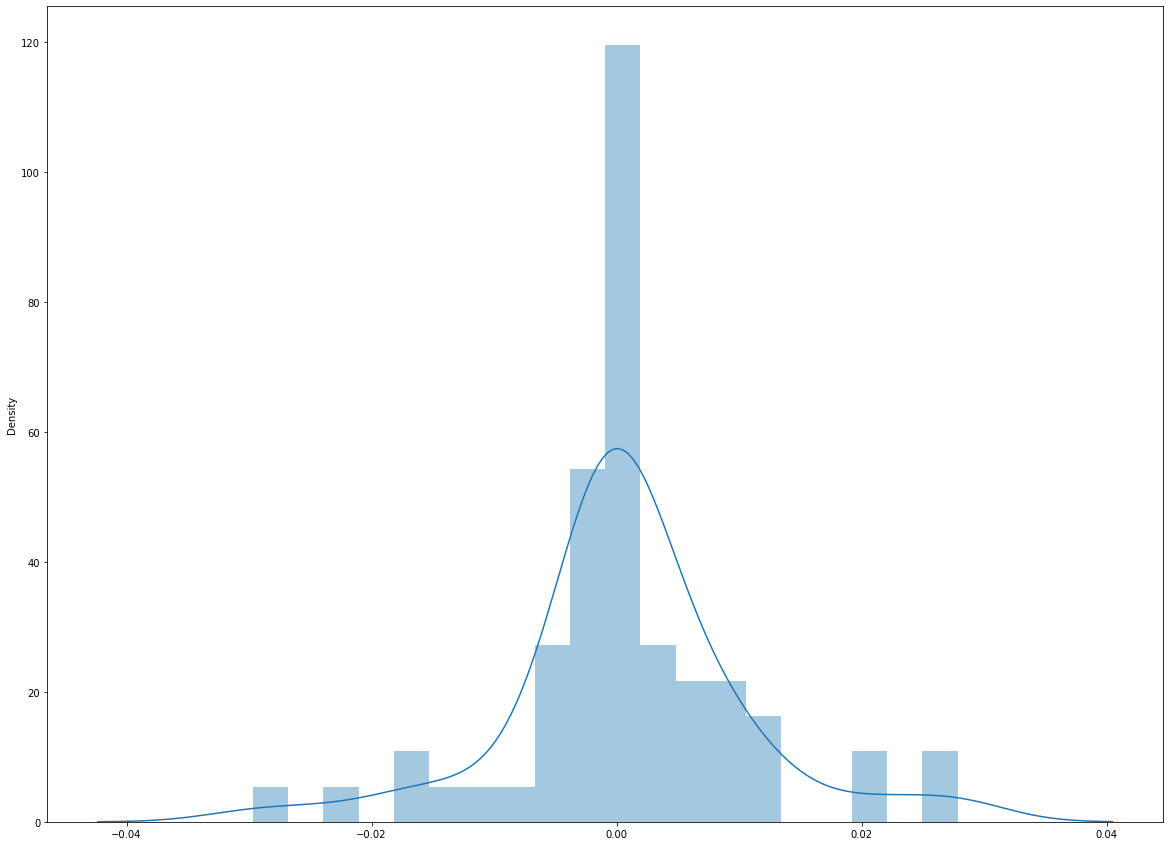

In [49]:
pyplot.subplots(figsize=(20,15))
sns.distplot(coeff_df3)

# 6 - Predicting with Model

In [50]:
pred = lm.predict(X_test)

In [51]:
pred

array([ 5.1740934 ,  3.94402094, 11.08548586,  2.00872659,  3.48010944,
        1.57960787,  0.51065246,  5.11023172,  0.99257901,  0.83238868,
        2.49545253,  1.02027489,  8.86951872,  1.50201498,  0.91246399,
        1.44572961, 10.28200302, -0.60783263,  3.01083596,  4.19468387,
        6.41217316,  2.52039125,  1.21399527,  0.55774259])

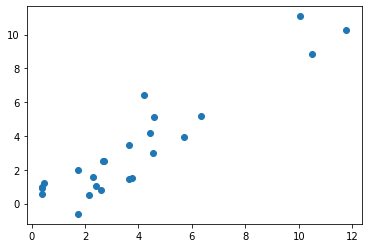

In [52]:
pyplot.scatter(y_test, pred)

### 6.1 - Residual Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


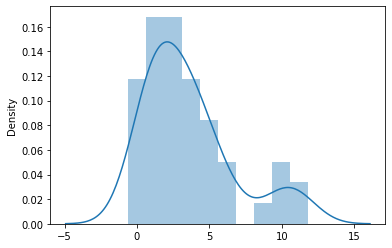

In [56]:
sns.distplot((y_test,pred), bins= 10)

# 6.2 - Evaluating Errors

In [61]:
print('Coefficient: \n', lm.coef_)

# The mean square Error 
print('Mean Square ERROR %.2f' % np.mean((pred - y_test) ** 2 ))
# Explained Varience Score : 1 is perfect prediction
print("Varience score %.2f" % lm.score(X_test, y_test))

Coefficient: 
 [-8.20720386e-03  5.40736581e-03  6.26342211e-03  4.36866163e-03
  1.92504507e-02  2.77933457e-02  1.29960633e-02  5.46226874e-05
  1.77711411e-03  2.78215173e-02 -1.23942920e-03 -4.79588640e-03
 -9.11728431e-04 -1.13600060e-03 -9.52102534e-04 -1.60447789e-03
 -8.51289998e-04 -4.00198333e-03  4.79049559e-03  3.91182206e-05
 -3.90800443e-03  3.25315201e-03 -2.96985093e-02  6.71203667e-03
  2.19164637e-02 -1.72502057e-02  9.97161626e-03  7.29457553e-03
 -7.14911383e-04 -1.38686000e-02  8.45605368e-03  1.27550876e-02
  5.82676982e-04 -5.12176758e-04 -1.57058704e-04 -1.15440307e-03
 -5.87425118e-05 -1.06821936e-02 -9.58148327e-04 -2.76064897e-04
  2.82948518e-05  7.68897958e-05  1.06058013e-04 -2.13983407e-03
 -2.34522965e-03  8.04203885e-03 -6.09395973e-03  1.29764182e-03
  9.71236164e-04  4.18289202e-04  1.08832839e-02 -1.67185066e-02
  4.41364878e-03  7.82850815e-03  1.39113850e-03 -2.37237482e-02
 -4.11654979e-04 -1.44189267e-03  9.39047696e-05  6.64991178e-06
  1.052311

### Predicting price of NGAS_EU for 2020 

In [64]:
X_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMO-data/test-data.csv')

In [65]:
X_new.head()

Unnamed: 0  CRUDE_PETRO  CRUDE_BRENT  ...         GOLD    PLATINUM     SILVER
0        2020    41.257778         42.3  ...  1770.254167  883.393333  20.536583

[1 rows x 69 columns]

In [67]:
X_new['LAMB'] = means['LAMB']

In [69]:
X_new.shape

(1, 69)

In [71]:
# in order to predict the values we need first to balance the colums of new data with model data 

X_new = X_new.drop(columns = list(missing_columns))

In [72]:
X_new.shape

(1, 64)

In [73]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1 non-null      int64  
 1   CRUDE_PETRO    1 non-null      float64
 2   CRUDE_BRENT    1 non-null      float64
 3   CRUDE_DUBAI    1 non-null      float64
 4   CRUDE_WTI      1 non-null      float64
 5   COAL_AUS       1 non-null      float64
 6   COAL_SAFRICA   1 non-null      float64
 7   NGAS_US        1 non-null      float64
 8   NGAS_JP        1 non-null      float64
 9   iNATGAS        1 non-null      float64
 10  COCOA          1 non-null      float64
 11  COFFEE_ARABIC  1 non-null      float64
 12  COFFEE_ROBUS   1 non-null      float64
 13  TEA_AVG        1 non-null      float64
 14  TEA_COLOMBO    1 non-null      float64
 15  TEA_KOLKATA    1 non-null      float64
 16  TEA_MOMBASA    1 non-null      float64
 17  COCONUT_OIL    1 non-null      float64
 18  GRNUT         

In [74]:
for c in list(X_new.columns):
  X_new[c] = X_new[c].astype('float64')

In [75]:
pred_new = lm.predict(X_new)

In [76]:
pred_new

array([3.18415163])

# Conclusion 

## The real value of 'NGAS_EU' for 2020 was 3.24 

In [82]:
NGAS_EU_2020_ORG = 3.24 
NGAS_EU_pred = pred_new 

print('2020 NGAS_UER original value:', NGAS_EU_2020_ORG)
print('2020 NGAS_UER original predicted:', NGAS_EU_pred )
print('Difference :', NGAS_EU_2020_ORG - NGAS_EU_pred )

print()
print('Prediction Accuracy:', 100-100*(NGAS_EU_2020_ORG - NGAS_EU_pred)/NGAS_EU_2020_ORG)

2020 NGAS_UER original value: 3.24
2020 NGAS_UER original predicted: [3.18415163]
Difference : [0.05584837]

Prediction Accuracy: [98.27628501]


##  Regression Evaliation Metrics

In [84]:
from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.1150476792285071
MSE: 1.7933540946639788
RMSE: 1.3391617134102882
